In [1]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [2]:
# Global Variables
stock_name = 'goog' # ticker symbol
model_name = 'Random Forest Classifier' # for display later
days_ahead = 1 # for predicting 1 day ahead
cv = 5 # number of cross validation folds

In [3]:
# Extract, Transform, Load, and Train Test Split
# aapl start date: 12/12/1980, trained 12/23/20
# tsla start date: 06/29/2010, trained 12/23/20
# vbiv start date: 09/04/2002, trained 12/23/20
# vgt start date: 01/26/2004, trained 12/23/20
# idex start date: 05/23/2007, trained 12/23/20
# iyw start date: 05/15/2000, trained 12/23/20
# 
start_dates = {'aapl':'12/12/1980'
               , 'baba': '09/15/2014'
               , 'crm': '06/23/2004'
               , 'goog': '08/16/2004'
               , 'idex': '05/23/2007'
               , 'iyw': '05/15/2000'
               , 'nvda': '01/22/1999'
               , 'pypl': '07/05/2015'
               , 'tsla': '06/29/2010'
               , 'vbiv': '09/04/2002'
               , 'vgt': '01/26/2004'
              }
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, start_dates[stock_name], days_ahead)

In [4]:
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction
Date,,,,,,,,,,,,
2020-12-11,1784.449951,1760.000000,1763.060059,1781.770020,1220700.0,1781.770020,-0.010612,0.013892,0.003628,0.008495,-0.005080,-1
2020-12-14,1797.390015,1757.214966,1775.000000,1760.060059,1600200.0,1760.060059,0.008417,0.022863,-0.012184,0.009050,-0.006586,1
2020-12-15,1771.420044,1749.949951,1764.420044,1767.770020,1482300.0,1767.770020,-0.001899,0.012269,0.004381,0.010077,-0.005607,-1
2020-12-16,1773.000000,1756.079956,1772.880005,1763.000000,1513500.0,1763.000000,0.005573,0.009635,-0.002698,0.006792,-0.002361,-1
2020-12-17,1771.784058,1738.660034,1768.510010,1747.900024,1624700.0,1747.900024,0.011654,0.019051,-0.008565,0.007310,-0.003088,-1
2020-12-18,1755.109985,1720.219971,1754.180054,1731.010010,4016400.0,1731.010010,0.013208,0.020282,-0.009663,0.006644,-0.005746,1
2020-12-21,1740.849976,1699.000000,1713.510010,1739.369995,1828400.0,1739.369995,-0.015092,0.024632,0.004830,0.006875,-0.002343,-1
2020-12-22,1737.405029,1712.574951,1734.430054,1723.500000,936700.0,1723.500000,0.006302,0.014499,-0.009124,0.006192,-0.005044,1
2020-12-23,1747.989990,1725.040039,1728.109985,1732.380005,1033800.0,1732.380005,-0.002471,0.013304,0.005152,0.007738,-0.003474,-1


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)

/home/david/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.70812529 0.70812529 0.70812529]
  warnings.warn(


In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

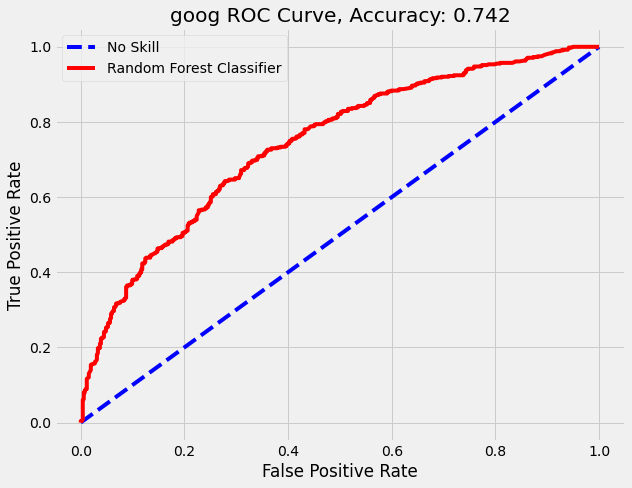

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, model_name)

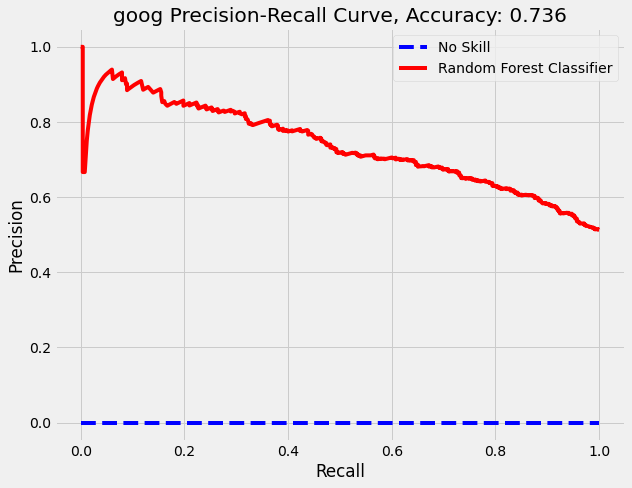

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, model_name)

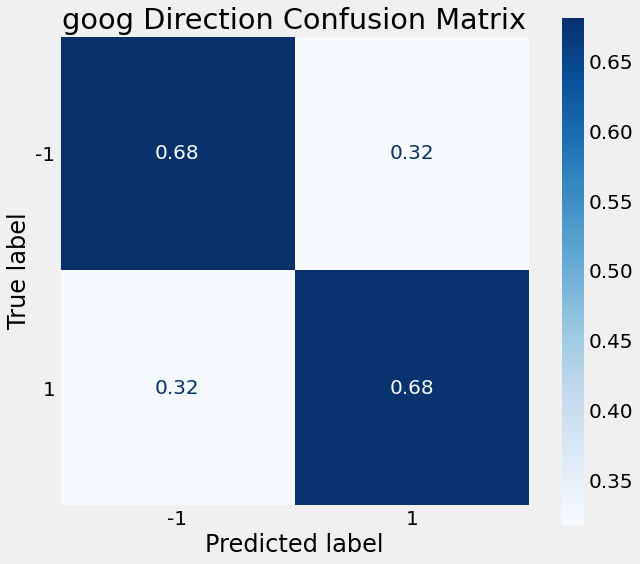

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, stock_name)

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.7024038219912314'

In [11]:
# Prediction, use last day of data
stock_df.iloc[-1]

High            1746.000000
Low             1729.109985
Open            1735.000000
Close           1738.849976
Volume        346800.000000
Adj Close       1738.849976
oc                -0.002219
hl                 0.009768
adj                0.003735
5stdev_adj         0.007670
5sma_adj          -0.001014
direction         -1.000000
Name: 2020-12-24 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-1]
last

oc           -0.002219
hl            0.009768
5stdev_adj    0.007670
5sma_adj     -0.001014
Name: 2020-12-24 00:00:00, dtype: float64

### Prediction...

In [13]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name}')
else:
    print(f'Sell or hold {stock_name}')

Sell or hold goog


In [14]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [15]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-18,1755.109985,1720.219971,1754.180054,1731.010010,4016400.0,1731.010010,0.013208,0.020282,-0.009663,0.006644,-0.005746,1,1,0.004830
2020-12-21,1740.849976,1699.000000,1713.510010,1739.369995,1828400.0,1739.369995,-0.015092,0.024632,0.004830,0.006875,-0.002343,-1,-1,0.009124
2020-12-22,1737.405029,1712.574951,1734.430054,1723.500000,936700.0,1723.500000,0.006302,0.014499,-0.009124,0.006192,-0.005044,1,1,0.005152
2020-12-23,1747.989990,1725.040039,1728.109985,1732.380005,1033800.0,1732.380005,-0.002471,0.013304,0.005152,0.007738,-0.003474,-1,-1,-0.003735
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800.0,1738.849976,-0.002219,0.009768,0.003735,0.007670,-0.001014,-1,-1,-0.000686


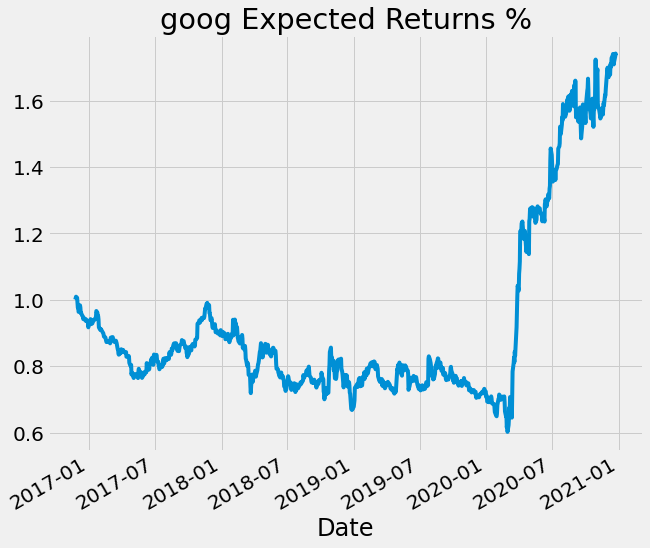

In [16]:
# Don't trade every day!
import matplotlib.pyplot as plt
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot()
plt.title(f'{stock_name} Expected Returns %');

In [17]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

2.1453466551793197

In [18]:
# multiple times original investment, not bad but...

In [19]:
# If purchased in 2012 and left it until now
test_idx = int(len(stock_df)*0.75)
(stock_df['Close'][-1] - stock_df['Close'][-test_idx]) /stock_df['Close'][-test_idx]

7.098402062313565

In [20]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/